<div class="alert alert-info"> <b>Ссылка на дашборд:</b> https://public.tableau.com/app/profile/iuliia5275/viz/Bankdashboard_16784135013690/Dashboard1?publish=yes

</div>



# Проект по анализу оттока клиентов Банка 

**Цель проекта:**

Необходимо проанализировать сегменты клиентов банка с целью определения портретов клиентов, которые склонны уходить из банка. 

Сформулировать выводы и рекомендации для заказчика для снижения уровня оттока клиентов.


**Заказчик:**

Менеджер продукта

**Данные:**

Датасет содержит данные о клиентах банка «Метанпром». Банк располагается в Ярославле и областных городах: Ростов Великий и Рыбинск.

Колонки:

- `userid` — идентификатор пользователя,
- `score` — баллы кредитного скоринга,
- `City` — город,
- `Gender` — пол,
- `Age` — возраст,
- `Objects` — количество объектов в собственности,
- `Balance` — баланс на счёте,
- `Products` — количество продуктов, которыми пользуется клиент,
- `CreditCard` — есть ли кредитная карта,
- `Loyalty` — активный клиент,
- `estimated_salary` — заработная плата клиента,
- `Churn` — ушёл или нет.

## План проекта

### Этап 1. Получение данных

- импорт библиотек
- загрузка данных
- ознакомление с датасетом

In [1]:
#импортируем библиотеки
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
import numpy as np
from scipy import stats as st

In [2]:
#откроем файл

try: # яндексовский путь
    data = pd.read_csv('/datasets/bank_dataset.csv')
except: # мой путь
    data = pd.read_csv('bank_dataset.csv')

In [3]:
#ознакомимся с данными
data.head() 

,userid,score,City,Gender,Age,Objects,Balance,Products,CreditCard,Loyalty,estimated_salary,Churn
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,101348.88,1
1,15690047,608,Рыбинск,Ж,41,1,83807.86,1,0,1,112542.58,0
2,15662040,502,Ярославль,Ж,42,8,159660.80,3,1,0,113931.57,1
3,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,93826.63,0
4,15780624,850,Рыбинск,Ж,43,2,125510.82,1,1,1,79084.10,0


In [4]:
#посмотрим общую информацию
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   userid            10000 non-null  int64  
 1   score             10000 non-null  int64  
 2   City              10000 non-null  object 
 3   Gender            10000 non-null  object 
 4   Age               10000 non-null  int64  
 5   Objects           10000 non-null  int64  
 6   Balance           6383 non-null   float64
 7   Products          10000 non-null  int64  
 8   CreditCard        10000 non-null  int64  
 9   Loyalty           10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


**Общий вывод по Этапу 1:**

Датасет представлен в виде 10 000 записей данных о клиентах банка в 3 городах: Ярославль, Ростов Великий и Рыбинск. Всего в представленной выборке клиенты пользуются 4 продуктами.

### Этап 2. Предобрадотка данных

- приведем названия столбцов к единому стилю (нижний регистр, без пропусков и т.п.)
- проверим наличие пропусков и сформулируем предположения об их причинах и возможностях корректировки
- проверим наличие дубликатов
- проверим наличие выбросов (аномалия или нет, необходимо удалять или нет)
- приведем типы данных к корректным типам


In [5]:
# приведем названия столбцов к нижнему регистру
data.columns = data.columns.str.lower()
data.columns

Index(['userid', 'score', 'city', 'gender', 'age', 'objects', 'balance',
       'products', 'creditcard', 'loyalty', 'estimated_salary', 'churn'],
      dtype='object')

In [6]:
#проверим количество пропусков
print(data.isna().sum())

userid                 0
score                  0
city                   0
gender                 0
age                    0
objects                0
balance             3617
products               0
creditcard             0
loyalty                0
estimated_salary       0
churn                  0
dtype: int64


In [7]:
data_without_balance = data[data.isna().any(axis=1)]
           
data_without_balance.describe()

,userid,score,age,objects,balance,products,creditcard,loyalty,estimated_salary,churn
count,3.617000e+03,3617.000000,3617.000000,3617.000000,0.0,3617.000000,3617.000000,3617.000000,3617.000000,3617.000000
mean,1.573469e+07,649.452861,38.434891,5.071330,NaN,1.784628,0.716616,0.517832,98983.559549,0.138236
std,7.194749e+04,96.158798,10.492002,2.860781,NaN,0.496455,0.450704,0.499751,57730.828955,0.345195
min,1.560844e+07,350.000000,18.000000,0.000000,NaN,1.000000,0.000000,0.000000,90.070000,0.000000
25%,1.567226e+07,583.000000,31.000000,3.000000,NaN,1.000000,0.000000,0.000000,49506.820000,0.000000
50%,1.573608e+07,651.000000,37.000000,5.000000,NaN,2.000000,1.000000,1.000000,98618.790000,0.000000
75%,1.579629e+07,717.000000,43.000000,7.000000,NaN,2.000000,1.000000,1.000000,148330.970000,0.000000
max,1.585810e+07,850.000000,88.000000,10.000000,NaN,4.000000,1.000000,1.000000,199992.480000,1.000000


Посмотрев на данные пользователей, у которых пропущены значения в балансе, мы не видим каких-то аномалий в остальных показателях. 

Пропуски есть только в графе с балансом на счету (треть всего датасета). 

Приведем значение столбца с балансом к бинарному типу, чтобы посмотреть, как пользователи распределены по разным признакам в зависимости от того, указана сумма баланса или нет.



In [8]:
# сделаем копию столбца баланса для перевода к значениям "не указан" и "указан"
data['balance_c'] = data['balance'].copy()

In [9]:
#заполним этот столбец значениями
data['balance_c'] = data['balance_c'].fillna('не указан')
data.loc[(data['balance_c'] != 'не указан'), 'balance_c'] = 'указан'

In [10]:
#напишем функцию, которая на вход будет принимать массив признаков, 
#по которым мы хотим увидеть данные в табличном виде 

def balance_data (columns):

    plt.figure(figsize=(20,10))
    
    for i, column in enumerate(columns):
        bins=data[column].unique().__len__()
    
        sns.histplot(x=column
                     , bins=bins
                     , data=data
                     , hue = 'balance_c'
                     , multiple = 'stack'
                     , palette = 'Blues'
                     , ax=plt.subplot(2, 3, i + 1))
        plt.xlabel(column)
        plt.ylabel('quantity of clients')
        
    plt.tight_layout()  
    plt.show()

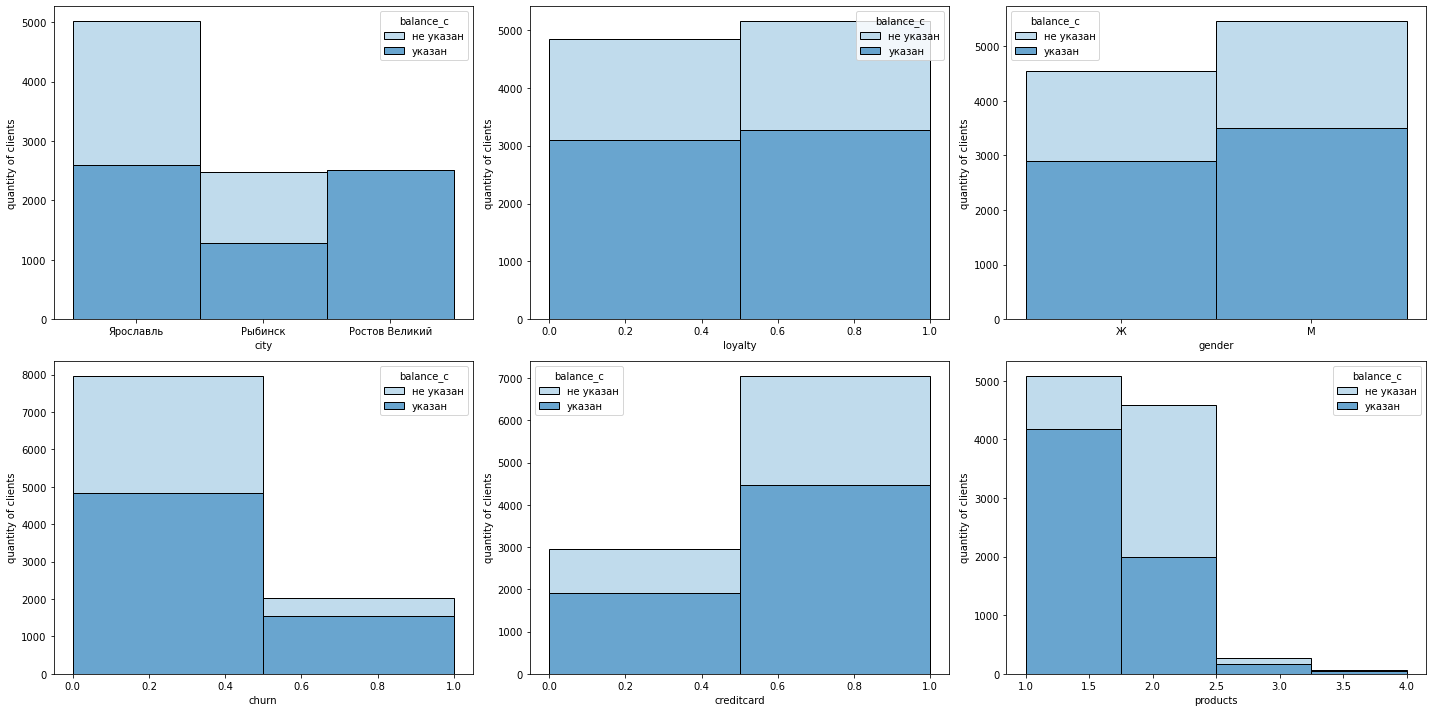

In [11]:
#передадим массив интересующих для анализа признаков
balance_data(['city','loyalty','gender','churn','creditcard','products'])

Итак из полученных данных мы можем видеть следующие особенности: 

1. У Ростова Великого у всех клиентов указаны значения баланса, при этом в остальных городах есть пропуски. 
2. У пользователей, которые перестали пользоваться услугами банка, доля пропусков существенно выше, чем у тех, кто остался пользоваться услугами. 
3. Чем больше количество продуктов - тем больше пропусков.
4. У пользователей без кредитных карт в банке доля пропусков выше. 


В целом, причин может быть несколько: 
 - во-первых, это может быть техническая ошибка выгрузки (как правило, в банке большое количество разных систем учета данных и ошибка могла быть при консолидации разных показателй из разных БД в одну таблицу). Вероятность технической ошибки также подтверждают данные в разибивке по городам - не может быть в одном городе ни одного пропуска, а в остальных они есть. Вероятно, данные есть, просто они некорректно выгружаются в общую таблицу. 
 - во-вторых, эта ошибка может быть обусловлена отрицательным балансом на счету, который не смог выгрузиться корректно и поэтому там оказался пропуск.  
 
В любом из этих случаев мы не можем самостоятельно заполнить пропуски, потому что это будет искажение данных. Удалять тоже их не будем, так как потеряем большой объем исходных данных. 

In [12]:
#проверим на наличие дубликатов
print(data.duplicated().sum())

0


Дубликатов не выявлено.

In [13]:
#выведем количество уникальных значений
print(data.nunique())

userid              10000
score                 460
city                    3
gender                  2
age                    70
objects                11
balance              6381
products                4
creditcard              2
loyalty                 2
estimated_salary     9999
churn                   2
balance_c               2
dtype: int64


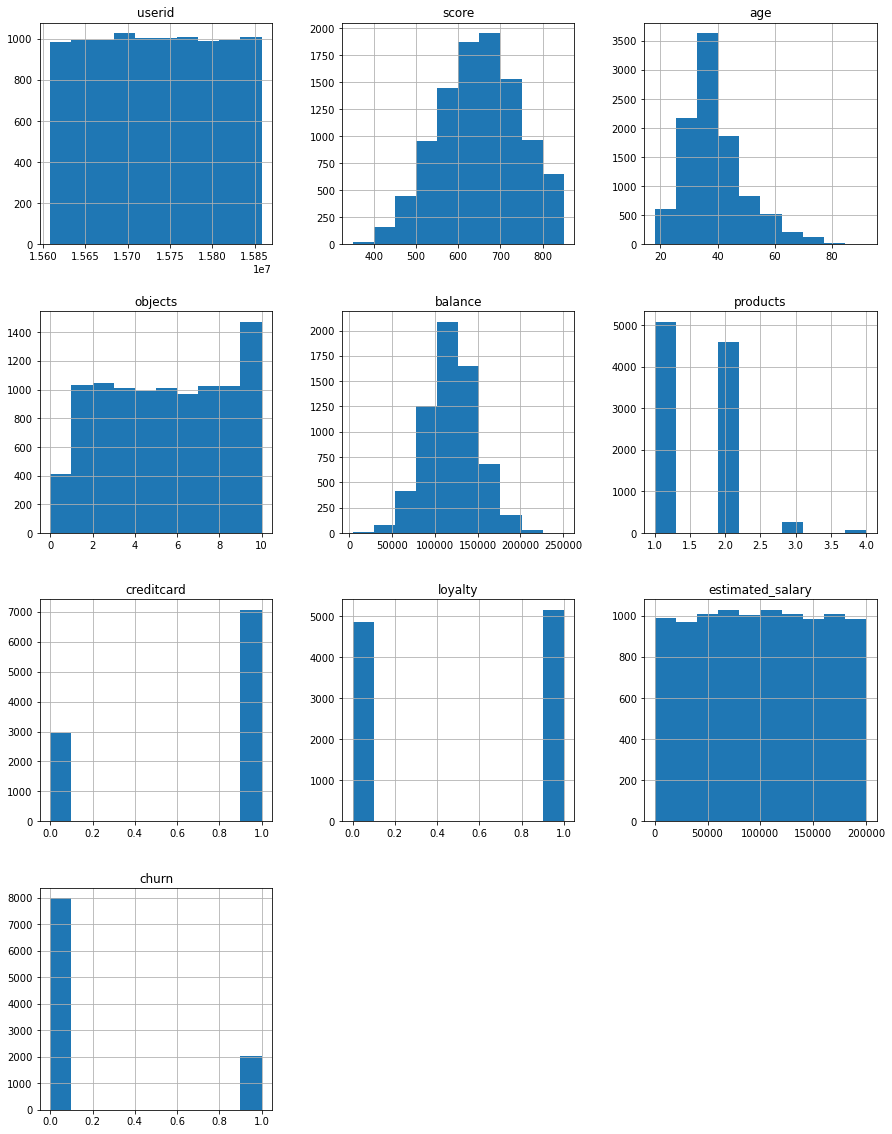

In [14]:
#проверим наличие аномалий (выбросов) во всем датасете
#гистограмма для каждого столбца таблицы data
data.hist(figsize=(15, 20)) 
plt.show()

Как видно из таблицы, все значения находятся в пределах адекватных границ.  

Типы данных отражены в датасете корректно, пожтому никаких изменений вносить не будем.

In [15]:
#изменим категориальные значения у города и пола для дальнейшей работы: 
#считать среднее и  корреляции какого-то числового показателя по этим категориям
# сделаем копии нужных столбцов
data['city_c'] = data['city'].copy()
data['gender_c'] = data['gender'].copy()

In [16]:
# перекодируем
data = pd.get_dummies(data, columns=['city_c', 'gender_c'])

In [17]:
#поправим названия новых столбцов для более удобной работы в дальнейшем
data = data.rename(columns={'city_c_Ростов Великий': 'rostov_v'
                            , 'city_c_Рыбинск': 'rybinsk'
                            , 'city_c_Ярославль': 'yaroslavl'
                            , 'gender_c_Ж': 'female'
                            , 'gender_c_М': 'male'})

**Общий вывод по Этапу 2:**

Единственная колонка с пропусками в датасете - это баланс на счету. Данные могли быть пропущены по технической ошибке, заполнять их не будем, так как нет для этого объективно корректного способа (медиана и средняя не дадут никакой информации, могут только исказить датасет). 

Дубликатов и аномалий в датасете не выявлено, все типы данных отражены корректно.

### Этап 3. Исследовательский анализ данных

- изучим датасет и распределение признаков: построим графики с разбивкой по городам, возрастам и т.п. 
- построим матрицу корреляций

In [18]:
#посмотрим на статистическую информацию по всему датасету
data.describe()

,userid,score,age,objects,balance,products,creditcard,loyalty,estimated_salary,churn,rostov_v,rybinsk,yaroslavl,female,male
count,1.000000e+04,10000.000000,10000.000000,10000.000000,6383.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.573368e+07,650.528800,38.921800,5.012800,119827.493793,1.530200,0.70550,0.515100,100090.239881,0.203700,0.250900,0.247700,0.501400,0.454300,0.545700
std,7.193619e+04,96.653299,10.487806,2.892174,30095.056462,0.581654,0.45584,0.499797,57510.492818,0.402769,0.433553,0.431698,0.500023,0.497932,0.497932
min,1.560844e+07,350.000000,18.000000,0.000000,3768.690000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.567126e+07,584.000000,32.000000,3.000000,100181.975000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.573347e+07,652.000000,37.000000,5.000000,119839.690000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,1.579597e+07,718.000000,44.000000,7.000000,139512.290000,2.000000,1.00000,1.000000,149388.247500,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000
max,1.585843e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Из полученной таблицы можем сделать следующие выводы по всему набору данных: 

- средний кредитный рейтинг составляет 650, этому среднему значению соответствуют 50% пользователей датасета
- средний возраст клиентов - 37 лет
- в среднем у клиентов в собственности 5 объектов, максимальное значение 10.
- баланс на счету в среднем в районе 120 тыс.руб, максимально 250 тыс.руб.
- 75% клиентов не пользуются больше, чем 2 продуктами банка
- 70% владеет кредитной картой
- 52% клиентов относятся к категории "активные" 
- средний уровень заработной платы около 100 тыс.руб., максимально 200 тыс.руб.
- 20% клиентов прекратили пользоваться услугами банка 
- большая часть клиентов (50%) - из Ярославля, Ростов Великий и Рыбинск обслуживают по 25% от общего числа клиентов
- мужины занимают 55% от общего количества, женщины 45% соответственно. 


Ключевой показатель из таблицы, который мы видим это отток в виде 20% клиентов. Достаточно существенный уровень.

Далее посмотрим более подробно как отток распределен по представленным признакам. 

In [19]:
#посмотрим как распределены средний значения срдеи тех, кто ушел, и тех, кто остался пользоваться услугами банка
data.groupby('churn').agg('mean').round(2)

,userid,score,age,objects,balance,products,creditcard,loyalty,estimated_salary,rostov_v,rybinsk,yaroslavl,female,male
churn,,,,,,,,,,,,,,
0,15733903.88,651.85,37.41,5.03,119535.86,1.54,0.71,0.55,99738.39,0.21,0.26,0.53,0.43,0.57
1,15732787.96,645.35,44.84,4.93,120746.97,1.48,0.70,0.36,101465.68,0.40,0.20,0.40,0.56,0.44


Каких-то существенных отклонений среди средних значений не выявлено. 

При этом из различий можем отметить следующее:
1. Средний возраст у ушедших клиентов 45 лет, у оставшихся - 47 лет.
2. Большая доля оттока у Ростова Великого (40%) и Ярославля (40%), у Рыбинска средний уровень не превышает 20%.
3. Большая часть ушедших клиентов - женщины (56%). 

Для наглядности построим графики по оттоку клиентов по следующим признакам:

Для количественных данных построим гистограммы распределения:

1. Возраст
2. Доход
3. Количество объектов
4. Кредитный рейтинг


In [20]:
#гистограмма распределения
def quantity_data (column):

    data.groupby('churn')[column].plot(kind='hist', bins=20, alpha=0.5, figsize = (15, 7))

    plt.xlabel(column)
    plt.ylabel('quantity of clients')
    plt.legend(labels=['active', 'churn'])
    plt.show()



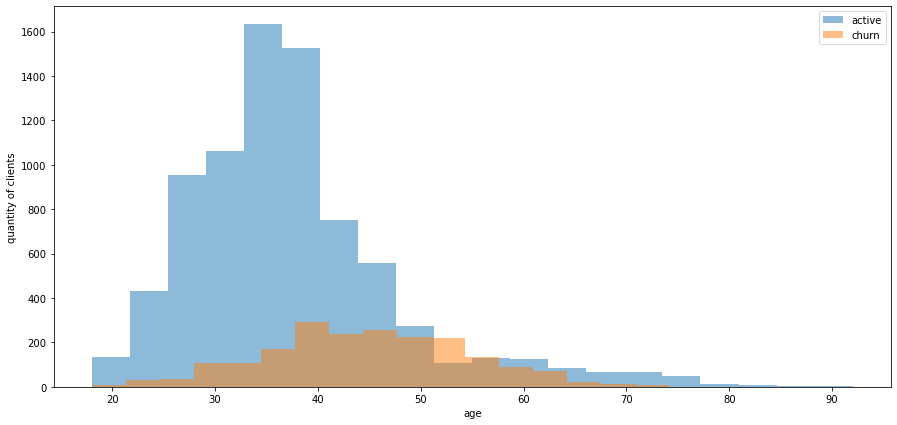

In [21]:
quantity_data ('age')

По графику видим, что большее количество потерянных клиентов приходится на возраст от 40 до 50 лет. При этом видим, что возраст от 35 до 40 представляет самое большое количество активных клиентов. 

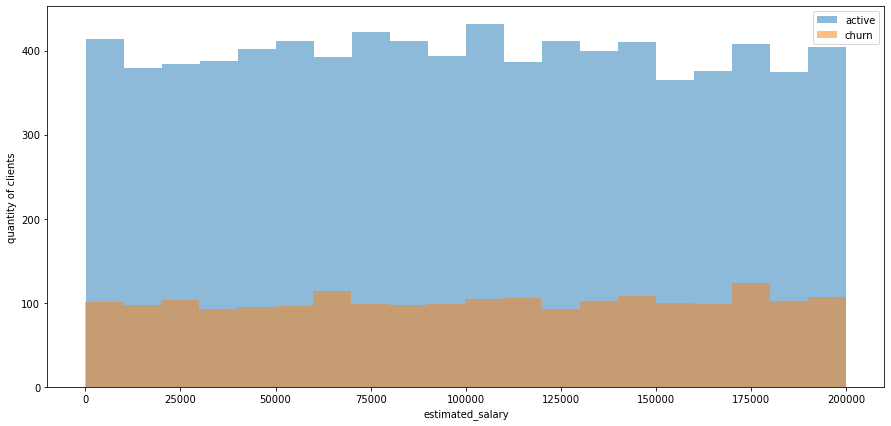

In [22]:
quantity_data ('estimated_salary')

По графику видим, доля потерянных клиентов стабильна среди клиентов с любым уровнем дохода. 

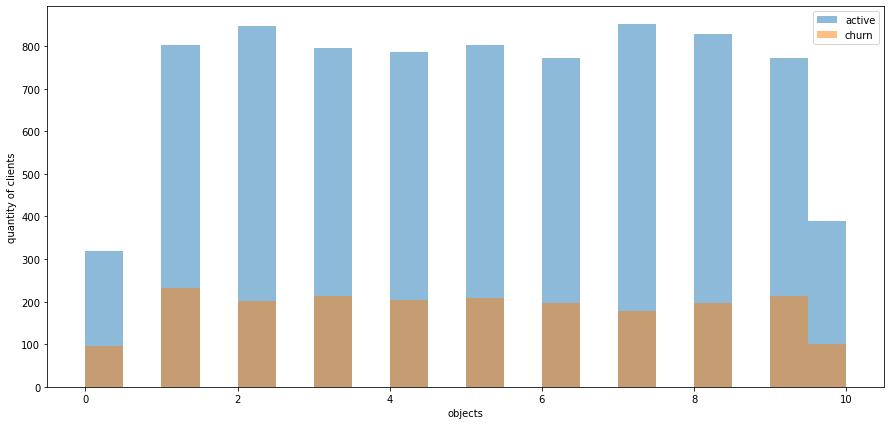

In [23]:
quantity_data ('objects')

По графику видим, что показатель оттока клиентов не меняется существенно от количества объектов во владении у этих клиентов. 

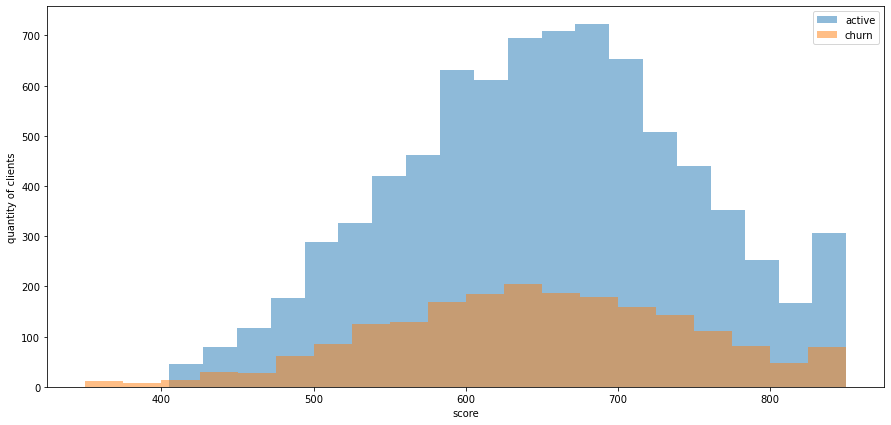

In [24]:
quantity_data ('score')

По графику видим, что наибольший отток среди тех, кто имеет 600-700 баллов по сокринговой системе, что соответствует в целом распределению клиентов - в этом скоринговом диапазоне их максимальное количество. 

Для категориальных данных построим гистограммы с накоплением:
 
1. Город
2. Пол
3. Количество продуктов
4. Наличие кредитных карт

In [25]:
def category_data (columns):

    plt.figure(figsize=(20,10))
    
    for i, column in enumerate(columns):
        bins=data[column].unique().__len__()
    
        sns.histplot(x=column
                     , bins=bins
                     , data=data
                     , hue = 'churn'
                     , multiple = 'stack'
                     , palette = 'Blues'
                     , ax=plt.subplot(2, len(columns)-2, i + 1))
        plt.xlabel(column)
        plt.ylabel('quantity of clients')
    
    plt.tight_layout()  
    plt.show()

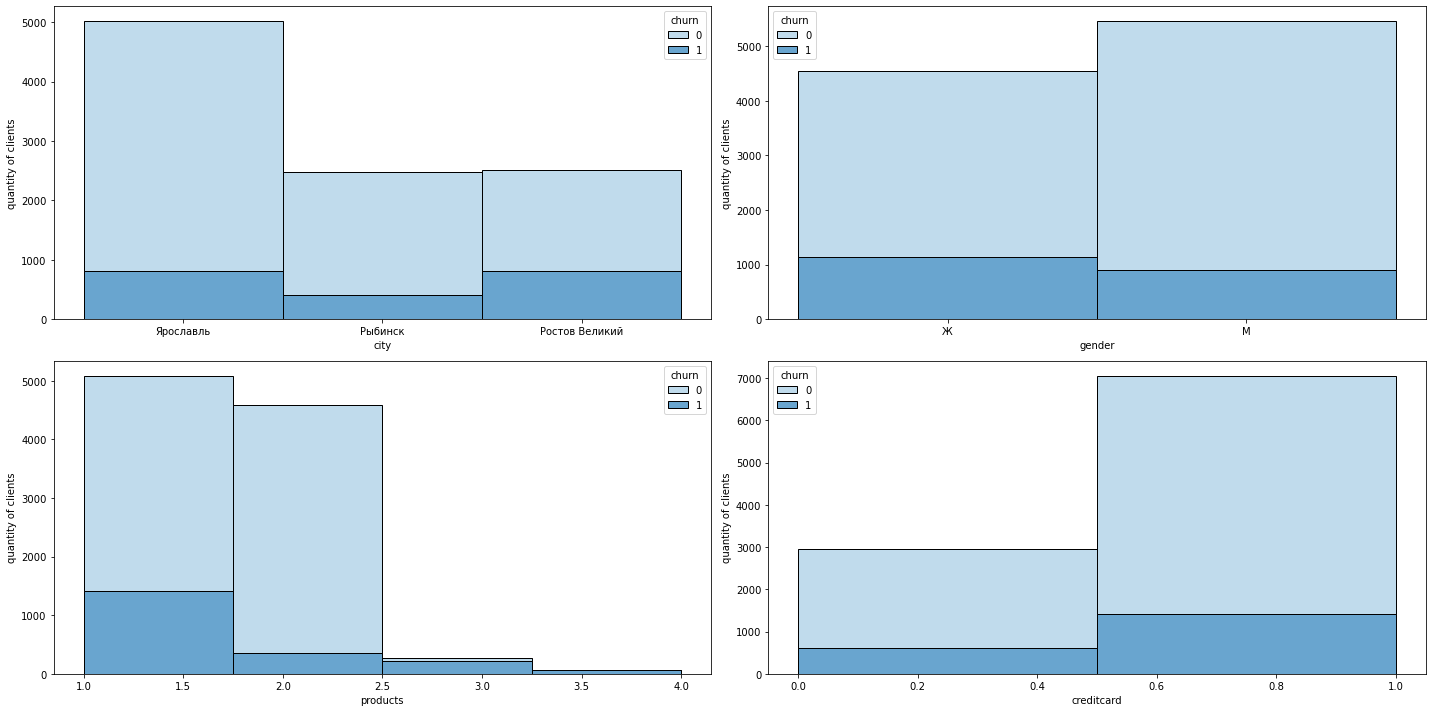

In [26]:
category_data(['city','gender','products','creditcard'])

1. Наибольший отток клиентов наблюдаем в Ростове Великом среди представленных городов.
2. Женщины чаще отказываются от улсуг банка, при этом разница относительно мужин несильная.
3. Наибольший отток показывают клиенты, которые пользуются 3 и более продуктами банка. 
4. Наличие кредитной карты не оказывает существенного влияния на отток.

Построим матрицу корреляций среди представленных признаков.

In [27]:
corr=data.drop('userid', axis=1).corr()
corr.style.background_gradient(cmap='Blues')

,score,age,objects,balance,products,creditcard,loyalty,estimated_salary,churn,rostov_v,rybinsk,yaroslavl,female,male
score,1.000000,-0.003965,0.000842,-0.004744,0.012238,-0.005458,0.025651,-0.001384,-0.027094,0.005538,0.004780,-0.008928,0.002857,-0.002857
age,-0.003965,1.000000,-0.009997,-0.012822,-0.030680,-0.011721,0.085472,-0.007201,0.285323,0.046897,-0.001685,-0.039208,0.027544,-0.027544
objects,0.000842,-0.009997,1.000000,0.005827,0.013444,0.022583,-0.028362,0.007784,-0.014001,-0.000567,0.003868,-0.002848,-0.014733,0.014733
balance,-0.004744,-0.012822,0.005827,1.000000,-0.001027,0.006721,-0.020418,-0.001856,0.017208,-0.002604,-0.000208,0.002759,-0.025742,0.025742
products,0.012238,-0.030680,0.013444,-0.001027,1.000000,0.003183,0.009612,0.014204,-0.047820,-0.010419,0.009039,0.001230,0.021859,-0.021859
creditcard,-0.005458,-0.011721,0.022583,0.006721,0.003183,1.000000,-0.011866,-0.009933,-0.007138,0.010577,-0.013480,0.002467,-0.005766,0.005766
loyalty,0.025651,0.085472,-0.028362,-0.020418,0.009612,-0.011866,1.000000,-0.011421,-0.156128,-0.020486,0.016732,0.003317,-0.022544,0.022544
estimated_salary,-0.001384,-0.007201,0.007784,-0.001856,0.014204,-0.009933,-0.011421,1.000000,0.012097,0.010297,-0.006482,-0.003332,0.008112,-0.008112
churn,-0.027094,0.285323,-0.014001,0.017208,-0.047820,-0.007138,-0.156128,0.012097,1.000000,0.173488,-0.052667,-0.104955,0.106512,-0.106512
rostov_v,0.005538,0.046897,-0.000567,-0.002604,-0.010419,0.010577,-0.020486,0.010297,0.173488,1.000000,-0.332084,-0.580359,0.024628,-0.024628


Исходя из полученной матрицы, видим, что наиболее зависим отток со следующими признаками:

1. Возраст (0.29)
2. Ростов Великий (0.17)
3. Женский пол (0.10).

**Общий вывод по Этапу 3:**


Общий уровень оттока от количества клиентов в датасете - 20%.

Признаки, которые могут влиять на отток:
1. Возраст - люди от 40 до 50 лет более часто отказывают от услуг банка
2. Город - Ростов Великий показывает наибольшее количество потерянных клиентов среди других городов.
3. Пол - женщины более склонны прекращать пользоваться улсугами банка.
4. Кол-во продуктов - чем больше кол-во продуктов, тем выше доля клиентов, отказавшихся от услуг банка



Признаки с наименьшим влиянием на отток:
1. Уровень заработной платы
2. Количество объектов в собственности
3. Кредитный рейтинг
4. наличие кредитных карт



### Этап 4. Сегментация клиентов

- сформируем сегменты по нескольким признакам (в зависимости от числа продуктов)
- сформируем портреты сегментов среди пользователей,которые наиболее склонны к оттоку


Добавим сегментацию по кол-ву продуктов. 

Итого у нас будет выделено 3 сегмента клиентов: 
1. Кто пользуется 1 продуктом
2. Кто пользуется 2 продуктами 
3. Кто пользучется больше, чем 3 продуктами. 

In [28]:
#сформируем 3 группы по количеству продуктов

def product_segment (products): 
    if products == 1:   
        return '1 продукт'
    if products == 2:
        return '2 продукта'
    else:
        return 'больше 3 продуктов'
 
data['product_segment'] = data['products'].apply(product_segment) 

In [29]:
data.head()

,userid,score,city,gender,age,objects,balance,products,creditcard,loyalty,estimated_salary,churn,balance_c,rostov_v,rybinsk,yaroslavl,female,male,product_segment
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,101348.88,1,не указан,0,0,1,1,0,1 продукт
1,15690047,608,Рыбинск,Ж,41,1,83807.86,1,0,1,112542.58,0,указан,0,1,0,1,0,1 продукт
2,15662040,502,Ярославль,Ж,42,8,159660.80,3,1,0,113931.57,1,указан,0,0,1,1,0,больше 3 продуктов
3,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,93826.63,0,не указан,0,0,1,1,0,2 продукта
4,15780624,850,Рыбинск,Ж,43,2,125510.82,1,1,1,79084.10,0,указан,0,1,0,1,0,1 продукт


In [30]:
def segment_data (column):

    plt.figure(figsize=(10,7))
    bins=data[column].unique().__len__()
    sns.histplot(x=column
                 , bins=bins
                 , data=data
                 , hue = 'churn'
                 , multiple = 'stack'
                 , palette = 'Blues')
    plt.xlabel(column)
    plt.ylabel('quantity of clients')
    plt.show()
    
    #добавим таблицу с кол-вом оставшихся и ушедших клиентов, а так же расчет доли ушедших клиентов
    data_table = data.pivot_table(index=column, columns='churn', aggfunc={'userid':'count'})

    data_table.columns = ['Действующие клиенты', 'Отток']

    data_table['Процент, %'] = (data_table['Отток'] / (data_table['Действующие клиенты'] + data_table['Отток'])*100).round(1)
    display(data_table)

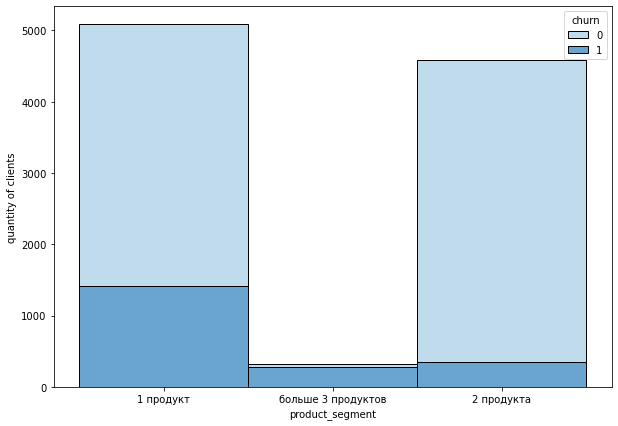

,Действующие клиенты,Отток,"Процент, %"
product_segment,,,
1 продукт,3675,1409,27.7
2 продукта,4242,348,7.6
больше 3 продуктов,46,280,85.9


In [31]:
segment_data('product_segment')

Исходя из графика видим, что наибольший отток происходит среди клиентов, которые пользуются больше чем 3 продуктами. 

Разделим всех пользователей по возрастным группам.

In [32]:
def age_segment (age): 
    if age <30:   
        return 'молодой'
    if  40> age >30:
        return 'средний'
    if  65> age >40:
        return 'взрослый'
    else:
        return 'пожилой'
 
data['age_segment'] = data['age'].apply(age_segment) 


In [33]:
data.head()

,userid,score,city,gender,age,objects,balance,products,creditcard,loyalty,estimated_salary,churn,balance_c,rostov_v,rybinsk,yaroslavl,female,male,product_segment,age_segment
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,101348.88,1,не указан,0,0,1,1,0,1 продукт,взрослый
1,15690047,608,Рыбинск,Ж,41,1,83807.86,1,0,1,112542.58,0,указан,0,1,0,1,0,1 продукт,взрослый
2,15662040,502,Ярославль,Ж,42,8,159660.80,3,1,0,113931.57,1,указан,0,0,1,1,0,больше 3 продуктов,взрослый
3,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,93826.63,0,не указан,0,0,1,1,0,2 продукта,средний
4,15780624,850,Рыбинск,Ж,43,2,125510.82,1,1,1,79084.10,0,указан,0,1,0,1,0,1 продукт,взрослый


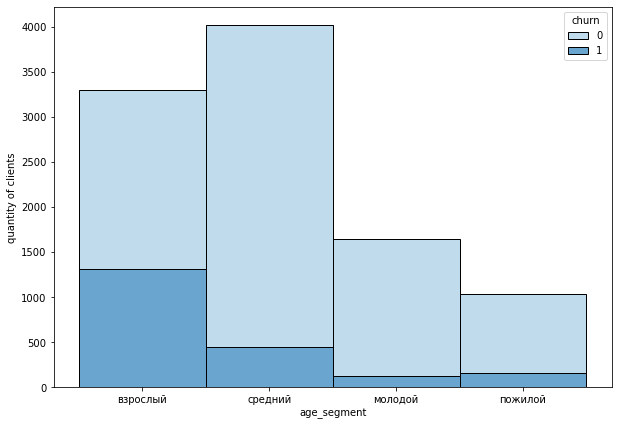

,Действующие клиенты,Отток,"Процент, %"
age_segment,,,
взрослый,1991,1308,39.6
молодой,1517,124,7.6
пожилой,885,156,15.0
средний,3570,449,11.2


In [34]:
segment_data('age_segment')

Исходя из графика видим, что наибольший отток происходит среди клиентов "взрослой" возратсной категории, т.е. от 40 до 65 лет.

**Проверим взаимосвязи кол-ва продуктов с разными признаками.**

В рамках исследователького анализа мы выявили, что наиболее существеннами признаками, влияющими на отток, являются: возраст, пол и город проживания. 



Построим графики по распределению оттока среди  выделенных 3 сегментов.

In [35]:
#в функцию по графикам добавим еще один параметр, который будет фильтровать датасет по кол-ву продуктов
def category_data_with_n_products (columns,products):

    plt.figure(figsize=(20,10))
    
    for i, column in enumerate(columns):
        bins=data[column].unique().__len__()
    
        sns.histplot(x=column
                     , bins=bins
                     , data=data.query('product_segment==@products')
                     , hue = 'churn'
                     , multiple = 'stack'
                     , palette = 'Blues'
                     , ax=plt.subplot(2, len(columns), i + 1))
        plt.xlabel(column)
        plt.ylabel('quantity of clients')
    
    plt.tight_layout()  
    plt.show()
    
    #добавим таблицу с кол-вом оставшихся и ушедших клиентов, а так же расчет доли ушедших клиентов
    data_table = data.query('product_segment==@products').pivot_table(index=columns, columns='churn', aggfunc={'userid':'count'})

    data_table.columns = ['Действующие клиенты', 'Отток']

    data_table['Процент, %'] = (data_table['Отток'] / (data_table['Действующие клиенты'] + data_table['Отток'])*100).round(1)
    display(data_table)

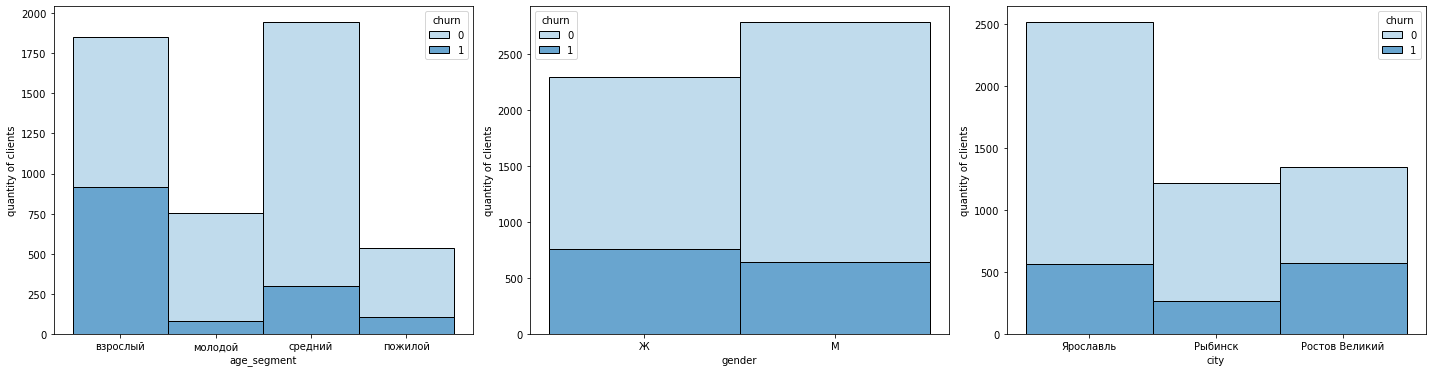

Действующие клиенты  Отток  Процент, %
age_segment gender city                                                  
взрослый    Ж      Ростов Великий                   91    201        68.8
                   Рыбинск                         112     83        42.6
                   Ярославль                       189    200        51.4
            М      Ростов Великий                  104    178        63.1
                   Рыбинск                         161     81        33.5
                   Ярославль                       278    172        38.2
молодой     Ж      Ростов Великий                   72     22        23.4
                   Рыбинск                          67     10        13.0
                   Ярославль                       150     15         9.1
            М      Ростов Великий                   88     11        11.1
                   Рыбинск                          87      8         8.4
                   Ярославль                       209     16         7.1
пожилой     Ж      Ростов Великий                   40     19        32.2
                   Рыбинск                          46     12        20.7
                   Ярославль                        85     33        28.0
            М      Ростов Великий                   47     21        30.9
                   Рыбинск                          63     10        13.7
                   Ярославль                       145     15         9.4
средний     Ж      Ростов Великий                  148     71        32.4
                   Рыбинск                         153     33        17.7
                   Ярославль                       381     63        14.2
            М      Ростов Великий                  181     55        23.3
                   Рыбинск                         265     30        10.2
                   Ярославль                       513     50         8.9

In [36]:
category_data_with_n_products(['age_segment','gender','city'],['1 продукт'])

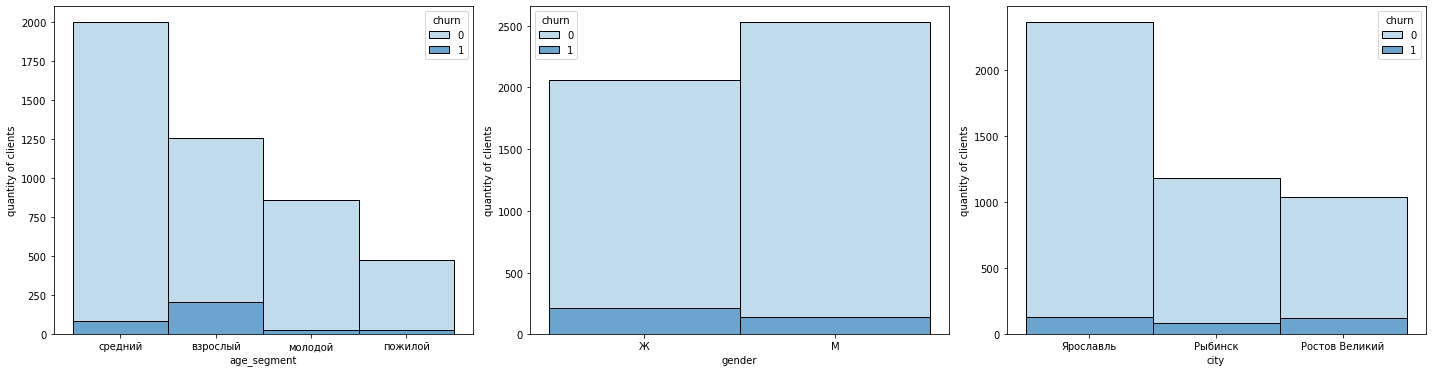

Действующие клиенты  Отток  Процент, %
age_segment gender city                                                  
взрослый    Ж      Ростов Великий                  108     46        29.9
                   Рыбинск                         123     36        22.6
                   Ярославль                       228     45        16.5
            М      Ростов Великий                  135     30        18.2
                   Рыбинск                         154     22        12.5
                   Ярославль                       300     30         9.1
молодой     Ж      Ростов Великий                   68      3         4.2
                   Рыбинск                          92      6         6.1
                   Ярославль                       222      5         2.2
            М      Ростов Великий                   95      5         5.0
                   Рыбинск                         122      1         0.8
                   Ярославль                       235      5         2.1
пожилой     Ж      Ростов Великий                   49      9        15.5
                   Рыбинск                          42      1         2.3
                   Ярославль                       110      4         3.5
            М      Ростов Великий                   56      6         9.7
                   Рыбинск                          57      2         3.4
                   Ярославль                       136      4         2.9
средний     Ж      Ростов Великий                  162     17         9.5
                   Рыбинск                         217     10         4.4
                   Ярославль                       429     28         6.1
            М      Ростов Великий                  241     10         4.0
                   Рыбинск                         289      9         3.0
                   Ярославль                       572     14         2.4

In [37]:
category_data_with_n_products(['age_segment','gender','city'],['2 продукта'])

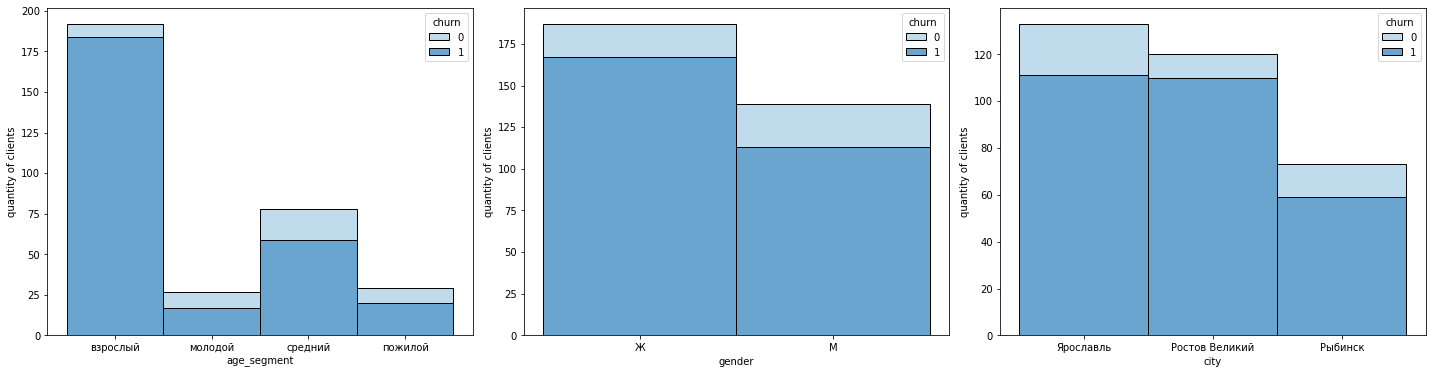

Действующие клиенты  Отток  Процент, %
age_segment gender city                                                  
взрослый    Ж      Ростов Великий                  2.0   36.0        94.7
                   Рыбинск                         NaN   28.0         NaN
                   Ярославль                       1.0   47.0        97.9
            М      Ростов Великий                  1.0   32.0        97.0
                   Рыбинск                         1.0   10.0        90.9
                   Ярославль                       3.0   31.0        91.2
молодой     Ж      Ростов Великий                  2.0    4.0        66.7
                   Рыбинск                         NaN    6.0         NaN
                   Ярославль                       3.0    3.0        50.0
            М      Ростов Великий                  NaN    2.0         NaN
                   Рыбинск                         3.0    1.0        25.0
                   Ярославль                       2.0    1.0        33.3
пожилой     Ж      Ростов Великий                  NaN    3.0         NaN
                   Рыбинск                         1.0    1.0        50.0
                   Ярославль                       2.0    6.0        75.0
            М      Ростов Великий                  NaN    7.0         NaN
                   Рыбинск                         1.0    2.0        66.7
                   Ярославль                       5.0    1.0        16.7
средний     Ж      Ростов Великий                  3.0   17.0        85.0
                   Рыбинск                         5.0    5.0        50.0
                   Ярославль                       1.0   11.0        91.7
            М      Ростов Великий                  2.0    9.0        81.8
                   Рыбинск                         3.0    6.0        66.7
                   Ярославль                       5.0   11.0        68.8

In [38]:
category_data_with_n_products(['age_segment','gender','city'],['больше 3 продуктов'])

Выводы по построенным графикам:
1. Из графиков видим, что самые лояльные клиенты - это те, кто пользуется 2 продуктами банка. Наибольший отток у тех, кто пользуется 3 и более продуктами. 
2. Наибольший уровень оттока у клиентов их "взрослой" категории, т.е. от 40 до 65 лет. Самые лояльные - клиенты из "средней" категории - т.е. от 30 до 40 лет.
3. Лидер по оттоку среди городов - Ростов Великий, наименьший уровень оттока - у Ярославля. 
4. Женщины чаще склонные прекращать пользоваться услугами банка в сравнении с мужчинами. 

**Общий вывод по Этапу 4:**

На основании вышеперечисленного, сформируем портреты клиентов, которые склонны отказаться от пользования услугами банка:

1 сегмент: пользуются 1 продуктом.

Женщины, проживающие в Ростове Великом в возрасте от 40 до 65 лет. Уровень оттока - 68,8%. 

2 сегмент: пользуются 2 продуктами.

Женщины, проживающие в Ростове Великом в возрасте от 40 до 65 лет. Уровень оттока - 29,9%.

3 сегмент: пользуются больше чем 3 продуктами.

Женщины, проживающие в Ростове Великом в возрасте от 40 до 65 лет. Уровень оттока - 94,7%.


В целом, наиболее уязвимым сегментом в целом вне зависимости от признаков являются клиенты, которые пользуются 3 и более продуктами. Уровень оттока - 85,9%.

    
 

### Этап 5. Статистическая проверка гипотез

Гипотезы:

- Средние доходы между клиентами, которые пользуются двумя продуктами банка и теми, которые пользуются одним одинаковые.

- Среднее значение возраста клиентов, которые ушли и тех, которые остались, одинаковое.

Будем использовать T-критерий (критерий Стьюдента). 

1. Сформулируем основную и альтернативную гипотезы:

H₀ - средние значения дохода клиентов, которые которые пользуются двумя продуктами банка и теми, которые пользуются одним, равны.

H₁ - средние значения дохода клиентов, которые которые пользуются двумя продуктами банка и теми, которые пользуются одним, не равны.

In [39]:
# Переменная со срезом клиентов с 1 продуктом
data_1_product = data.query('products == 1')
data_1_product.head()

,userid,score,city,gender,age,objects,balance,products,creditcard,loyalty,estimated_salary,churn,balance_c,rostov_v,rybinsk,yaroslavl,female,male,product_segment,age_segment
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,101348.88,1,не указан,0,0,1,1,0,1 продукт,взрослый
1,15690047,608,Рыбинск,Ж,41,1,83807.86,1,0,1,112542.58,0,указан,0,1,0,1,0,1 продукт,взрослый
4,15780624,850,Рыбинск,Ж,43,2,125510.82,1,1,1,79084.10,0,указан,0,1,0,1,0,1 продукт,взрослый
9,15635125,684,Ярославль,М,27,2,134603.88,1,1,1,71725.73,0,указан,0,0,1,0,1,1 продукт,молодой
16,15780188,653,Ростов Великий,М,58,1,132602.88,1,1,0,5097.67,1,указан,1,0,0,0,1,1 продукт,взрослый


In [40]:
# Переменная со срезом клиентов с 2 продуктами
data_2_product = data.query('products == 2')
data_2_product.head()

,userid,score,city,gender,age,objects,balance,products,creditcard,loyalty,estimated_salary,churn,balance_c,rostov_v,rybinsk,yaroslavl,female,male,product_segment,age_segment
3,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,93826.63,0,не указан,0,0,1,1,0,2 продукта,средний
5,15616748,645,Рыбинск,М,44,8,113755.78,2,1,0,149756.71,1,указан,0,1,0,0,1,2 продукта,взрослый
6,15635267,822,Ярославль,М,50,7,NaN,2,1,1,10062.80,0,не указан,0,0,1,0,1,2 продукта,взрослый
8,15835101,501,Ярославль,М,44,4,142051.07,2,0,1,74940.50,0,указан,0,0,1,0,1,2 продукта,взрослый
10,15810557,528,Ярославль,М,31,6,102016.72,2,0,0,80181.12,0,указан,0,0,1,0,1,2 продукта,средний


In [41]:
#специальным методом проверим гипотезу о равенстве среднего двух генеральных совокупностей
alpha = 0.05 # критический уровень статистической значимости

results = st.ttest_ind(
    data_1_product['estimated_salary'], 
    data_2_product['estimated_salary'],
    equal_var = False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.4106493940071987
Не получилось отвергнуть нулевую гипотезу


Вероятность получить равнозначность средних значений в двух выборках = 41%. Нулевая гипотеза вероятна.

2. Сформулируем основную и альтернативную гипотезы:

H₀ - средний возраст клиентов, которые которые ушли и тех, которые пользуются продуктами банка, равен.

H₁ - средний возраст клиентов, которые которые ушли и тех, которые пользуются продуктами банка, не равен.

In [42]:
# Переменная со срезом клиентов, которые ушли
data_churn = data.query('churn == 1')
data_churn.head()

,userid,score,city,gender,age,objects,balance,products,creditcard,loyalty,estimated_salary,churn,balance_c,rostov_v,rybinsk,yaroslavl,female,male,product_segment,age_segment
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,101348.88,1,не указан,0,0,1,1,0,1 продукт,взрослый
2,15662040,502,Ярославль,Ж,42,8,159660.80,3,1,0,113931.57,1,указан,0,0,1,1,0,больше 3 продуктов,взрослый
5,15616748,645,Рыбинск,М,44,8,113755.78,2,1,0,149756.71,1,указан,0,1,0,0,1,2 продукта,взрослый
7,15698884,376,Ростов Великий,Ж,29,4,115046.74,4,1,0,119346.88,1,указан,1,0,0,1,0,больше 3 продуктов,молодой
16,15780188,653,Ростов Великий,М,58,1,132602.88,1,1,0,5097.67,1,указан,1,0,0,0,1,1 продукт,взрослый


In [43]:
# Переменная со срезом клиентов, которые остались
data_not_churn = data.query('churn == 0')
data_not_churn.head()

,userid,score,city,gender,age,objects,balance,products,creditcard,loyalty,estimated_salary,churn,balance_c,rostov_v,rybinsk,yaroslavl,female,male,product_segment,age_segment
1,15690047,608,Рыбинск,Ж,41,1,83807.86,1,0,1,112542.58,0,указан,0,1,0,1,0,1 продукт,взрослый
3,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,93826.63,0,не указан,0,0,1,1,0,2 продукта,средний
4,15780624,850,Рыбинск,Ж,43,2,125510.82,1,1,1,79084.10,0,указан,0,1,0,1,0,1 продукт,взрослый
6,15635267,822,Ярославль,М,50,7,NaN,2,1,1,10062.80,0,не указан,0,0,1,0,1,2 продукта,взрослый
8,15835101,501,Ярославль,М,44,4,142051.07,2,0,1,74940.50,0,указан,0,0,1,0,1,2 продукта,взрослый


In [44]:
#специальным методом проверим гипотезу о равенстве среднего двух генеральных совокупностей
alpha = 0.05 # критический уровень статистической значимости

results = st.ttest_ind(
    data_churn['age'], 
    data_not_churn['age'],
    equal_var = False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 4.7127272656641046e-179
Отвергаем нулевую гипотезу


Нулевая гипотеза не подтвердилась.
В целом, в рамках исследования мы подтвердили этого фактическими данными - средний возраст клиентов в оттоке существенно отличается от среднего возраста лояльных клиентов. 

### Этап 6. Выводы и рекомендации

- общая информация о работе
- опишем сегменты: признаковое описание и рекомендации.

В рамках работы были проанализированы данные клиентов банка "Матанпромбанк".

На основании анализа было выявлено, что доля оттока клиентов составляет 20%. 


Самыми существенными признаками, влияющими на отток, выявлены следующие:
    
   1. Количество продуктов: если клиенты используют больше 3 продуктов, то они более слконны прекращать сотрудничесвто с банком.
   2. Город проживания: наибольшие проблемы выявлены в городе Ростов Великий, в нем максимальный показатель оттока.
   3. Возраст: клиенты из "взрослой" категории от 40 до 65 лет наиболее часто перестают пользоваться услугами банка.
        

В рамках исследования были сформированы следующие сегменты пользователей: 

**1 сегмент - пользуются 1 продуктом**

*Описание:*
Общий уровень оттока в данном сегменте - 27,7%.

Самые лояльные клиенты - это мужчины и женщины, проживающие в городе Ярославаль, в возрасте до 30 лет. Уровень оттока от 7 до 9 %.

Нелояльные клиенты - преимущественно женщины, проживающие в Ростове Великом, в возрасте от 40 до 65 лет. Уровень оттока 68,8%. 

*Рекомендации:*

Необходимо проработать вопрос о предосталвении клиентам еще 1 продукта, так как данные показывают, что кодга клиент пользуется 2 продуктами, его взаимоотношения с банком более устойчивые. 

**2 сегмент - пользуются 2 продуктами**

*Описание:*
Общий уровень оттока в данном сегменте - 7,6%.

Самые лояльные клиенты - это мужчины, проживающие в городе Рыбинск, в возрасте до 30 лет. Уровень оттока от 0,8% и женщины, проживающие в городе Ярославль, в возрасте до 30 лет. Уровень оттока от 2,2%.

Нелояльные клиенты - преимущественно женщины, проживающие в Ростове Великом, в возрасте от 40 до 65 лет. Уровень оттока 29,9%. 

*Рекомендации:*

Данные показывают, что когда клиент пользуется 2 продуктами, его взаимоотношения с банком более устойчивые. Данный сегмент показывает самый низкий уровень оттока среди клиентов банка.

**3 сегмент - пользуются 3 и более продуктами**

*Описание:*
Общий уровень оттока в данном сегменте - 85,9%.

Уровень оттока слишком высокий, лояльных клиентов выделять нерелевантно.

Нелояльные клиенты - мужичны и женщины, проживающие в Ростове Великом, в возрасте от 40 до 65 лет. Уровень оттока в срденем 95-97%. 

*Рекомендации:*

1.Проработать марктеинговую стратегию относительно предлагаемых продуктов: как гипотеза, люди перестают пользоваться продуктами от чрезмерного пристуствия банка в их повседневной жизни, как только кол-во продуктов становится больше 3, возможно, клиент начинает чувствовать "давление" от банка и перестает пользоваться услугами банка. Возможно, банк, видя, что клиент готов покупать больше 2 продуктов, вилит в нем "лояльность" и начинает грузить его оставшимся пулом продуктов, рассчитывая, что лояльный клиент их купит. В общем, необходимо посмотреть с точки зрения маркетингового взаимодействия с клиентом, что отличается в опыте работы с клиентами, у которых есть только 2 банковских продукта, и с теми, у которых их больше. Возможно ответ на этот вопрос может быть получен как исходя из анализа регламентов по процедурам привлечения и удержания клиентов, а также при помощи глубинных интервью с клиентами, которые престали пользоваться услугами банка, при этом которые ранее имели больше 2 продуктов в банке.

2. Выявить причины существенного количества потерянных клиентов в городе Ростов Великий - что является причиной - возможно, в рамках отделения страдает сервис, возможно, отделение испытывается какие-либо технические трудности. 

3. Проработать возможные причины оттока "взрослых" клиентов (40-65 лет). Возможная причина в снижении цифровой грамотности клиентов с одновременным упором на цифровизацию сервисов со стороны банка. Как гипотеза, превентивно перед отцифровыванием процесса необходимо проводить консультации/обучения по изменениям в предлагаемых сервисах/услугах. 
    